<h1>Co-visit Insights</h1>

In [147]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='openpyxl')

In [148]:
data_xlsx_path = '../data/TEIS_IFSP_Teaming_Jan_2022-_Jan_2023.xlsx'
ifsp_teaming_df = pd.read_excel(data_xlsx_path, sheet_name='Compiled_IFSP Teaming')
all_children_ifsp_df = pd.read_excel(data_xlsx_path, sheet_name='All Children with IFSPs')

In [149]:
# Getting the distinct number of children with IFSPs
n_unique_children = all_children_ifsp_df['Child ID'].nunique()

# Getting all of the covisit records
covisit_df = ifsp_teaming_df[ifsp_teaming_df['IFSP Teaming ID name'] == 'Co-Visit']
n_covisits = len(covisit_df)

print(f'Initial Number of total co-visits: {n_covisits}')

# Removing the duplicates
covisit_df = covisit_df.drop_duplicates(subset=['CHILD_ID', 'SERVICE_DATE', 'Service Name'])
n_covisits = len(covisit_df)

print(f'Number of total co-visits: {n_covisits}')
print(f'Number of unique children with IFSPs: {n_unique_children}')

Initial Number of total co-visits: 4091
Number of total co-visits: 4087
Number of unique children with IFSPs: 19623


<h3>1. Children can have up to 6 co-visits per year. How many are recieving all 6 visits? Are there any who are exceeding 6 visits? In what setting do co-visits typically occur?</h3>

In [150]:
n_children_receiving_6_visits_per_year = 0
n_children_receiving_more_than_6_visits_per_year = 0
children_covisit_insights = {}
service_settings = {
    'community_based': 0,
    'error': 0,
    'home': 0,
    'other': 0,
    'telehealth': 0
}

for index, row in covisit_df.iterrows():
    # excluding any records where the date is in the month january 2022 in order to only use 1 year of data
    year_month = row['SERVICE_DATE'].strftime('%Y-%m')
    if year_month == '2023-01': continue

    # Building the dictionary entry
    child_id = row['CHILD_ID']
    if child_id not in children_covisit_insights:
        children_covisit_insights[child_id] = {
            'n_visits': 1
        }
    else:
        children_covisit_insights[child_id]['n_visits'] += 1

        if children_covisit_insights[child_id]['n_visits'] == 6:
            n_children_receiving_6_visits_per_year += 1
        elif children_covisit_insights[child_id]['n_visits'] == 7:
            n_children_receiving_more_than_6_visits_per_year += 1
            n_children_receiving_6_visits_per_year -= 1

    # Incrementing the appropriate service setting
    service_setting = str(row['SERVICE_SETTING']).lower()
    if service_setting == 'community-based':
        service_settings['community_based'] += 1
    elif service_setting == 'home':
        service_settings['home'] += 1
    elif service_setting == 'other':
        service_settings['other'] += 1
    elif service_setting == 'telehealth':
        service_settings['telehealth'] += 1
    else:
        service_settings['error'] += 1

# Insights
print(f'The number of children receiving co-visits: {len(children_covisit_insights)}')
print(f'Number of children receiving 6 co-visits per year: {n_children_receiving_6_visits_per_year}')
print(f'Number of children receiving more than 6 co-visits per year: {n_children_receiving_more_than_6_visits_per_year}')

# Get the service setting from dataframes
new_service_settings = {
    'community_based': 0,
    'error': 0,
    'home': 0,
    'other': 0,
    'telehealth': 0
}
service_setting_df = covisit_df[['CHILD_ID', 'SERVICE_SETTING']]
for index, row in service_setting_df.iterrows():
    service_setting = str(row['SERVICE_SETTING']).lower()
    if service_setting == 'community-based':
        new_service_settings['community_based'] += 1
    elif service_setting == 'home':
        new_service_settings['home'] += 1
    elif service_setting == 'other':
        new_service_settings['other'] += 1
    elif service_setting == 'telehealth':
        new_service_settings['telehealth'] += 1
    else:
        new_service_settings['error'] += 1

# Turn the dictionary into a dataframe
new_service_settings_df = pd.DataFrame.from_dict(new_service_settings, orient='index', columns=['count'])

# Add new column for percentage
new_service_settings_df['percentage'] = new_service_settings_df['count'] / n_covisits * 100

print(new_service_settings_df)

The number of children receiving co-visits: 1504
Number of children receiving 6 co-visits per year: 30
Number of children receiving more than 6 co-visits per year: 86
                 count  percentage
community_based    869   21.262540
error                3    0.073403
home              1941   47.492048
other              499   12.209445
telehealth         775   18.962564


In [182]:
all_covists_df = ifsp_teaming_df[ifsp_teaming_df["IFSP Teaming ID name"] == 'Co-Visit']
successful_covists_df = all_covists_df[all_covists_df["SERVICE DELIVERY"] == 'Service Delivered']
successful_covists_in_2022_df = successful_covists_df[successful_covists_df['SERVICE_DATE'] < '2023-01-01']

n_covisits_per_child = successful_covists_in_2022_df.groupby(['CHILD_ID']).size()
n_covisits_per_child_desc = n_covisits_per_child.sort_values(ascending=False)

n_children_receiving_more_than_6_covisits_per_year = len(n_covisits_per_child_desc.loc[lambda x : x > 6])

n_children_receiving_6_covisits_per_year = len(n_covisits_per_child_desc.loc[lambda x : x == 6])
children_receiving_6_covisits_per_year = n_covisits_per_child_desc.loc[lambda x : x == 6]

settings_df = successful_covists_in_2022_df.groupby(['SERVICE_SETTING']).size()

print(f'Initial Number of total co-visits: {len(all_covists_df)}')
print(f'Number of total co-visits: {len(successful_covists_df)}')
print(f'Number of total co-visits in 2022: {len(successful_covists_in_2022_df)}')
print(f'The number children receiving co-visits: {len(n_covisits_per_child)}')
print(f'Number of children receiving 6 co-visits per year: {n_children_receiving_6_covisits_per_year}')
print(f'Number of children receiving more than 6 co-visits per year: {n_children_receiving_more_than_6_covisits_per_year}')

Initial Number of total co-visits: 4091
Number of total co-visits: 4087
Number of total co-visits in 2022: 3695
The number children receiving co-visits: 1501
Number of children receiving 6 co-visits per year: 30
Number of children receiving more than 6 co-visits per year: 86


Total number of children: 4789
   6_covisits  more_than_6_covisits  less_than_6_covisits
0          30                    86                  1385


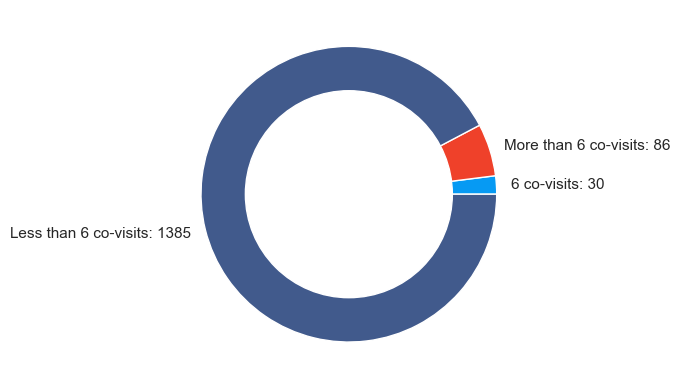

In [257]:
n_children_receiving_less_than_6_covisits_per_year = len(n_covisits_per_child_desc.loc[lambda x : x < 6])

# create data
size_of_groups = [
    n_children_receiving_6_covisits_per_year,
    n_children_receiving_more_than_6_covisits_per_year,
    n_children_receiving_less_than_6_covisits_per_year
]

# Create a pieplot
plt.pie(size_of_groups, labels = [
    f'6 co-visits: {n_children_receiving_6_covisits_per_year}',
    f'More than 6 co-visits: {n_children_receiving_more_than_6_covisits_per_year}',
    f'Less than 6 co-visits: {n_children_receiving_less_than_6_covisits_per_year}'
])

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle((0, 0), 0.7, color='white')

# Make graph custom colors
colors = ["#069AF3", "#EF412A", "#415A8C"]
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=colors)

p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

<h3>2. How many children received 0 co-visits?</h3>

In [152]:
# How many children are receiving no visits
n_children_receiving_no_visits = n_unique_children - len(children_covisit_insights)

percentage_of_children_receiving_no_visits = round((n_children_receiving_no_visits / n_unique_children) * 100, 2)

print(f'Number of unique children: {n_unique_children}')
print(f'Number of children receiving no visits: {n_children_receiving_no_visits} or {percentage_of_children_receiving_no_visits}%')

Number of unique children: 19623
Number of children receiving no visits: 18119 or 92.34%


<h3>3. What is the average duration of a co-visit?</h3>

In [153]:
# Scrub dataframe to drop NaN values
covisit_df = covisit_df.dropna(subset=['START_TIME', 'END_TIME'])

# Getting the average duration of the co-visits
covisit_durations = []
for index, row in covisit_df.iterrows():
    time1 = datetime.strptime(str(row['START_TIME']), "%H:%M:%S").time()
    time2 = datetime.strptime(str(row['END_TIME']), "%H:%M:%S").time()

    # Convert the time objects to datetime objects
    datetime1 = datetime.combine(datetime.today(), time1)
    datetime2 = datetime.combine(datetime.today(), time2)

    time_diff = datetime2 - datetime1
    covisit_durations.append(time_diff)

total_delta = sum(covisit_durations, timedelta())
average_delta = total_delta / len(covisit_durations)
print(f'The average duration of a co-visit is: {average_delta}')

The average duration of a co-visit is: 0:58:26.333578


<h3>Plot out the distribution of the number of co-visits the children are receiving</h3>

      CHILD_ID  n_covisits
0       457136           1
1       458850           1
2       458851           1
3       459167           6
4       459566           1
...        ...         ...
1496    536899           1
1497    537104           1
1498    537193           2
1499    539820           2
1500    540001           1

[1501 rows x 2 columns]


[Text(0.5, 0, 'Number of Co-Visits'), Text(0, 0.5, 'Number of Children')]

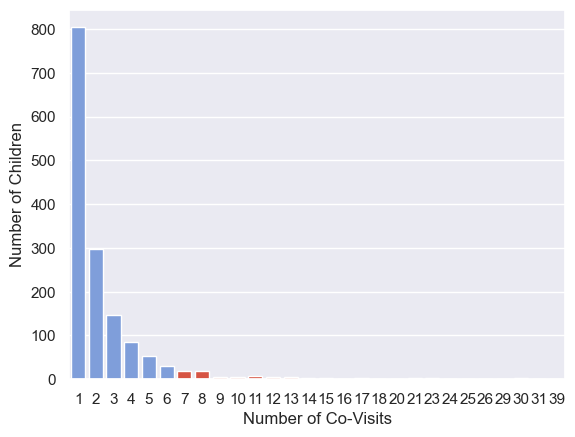

In [179]:
# Formatting the dataframe to get the number of visits per child
n_visits_per_child = successful_covists_in_2022_df.groupby(['CHILD_ID'])['CHILD_ID'].count().reset_index(name="n_covisits")
# n_visits_per_child_desc = n_visits_per_child.sort_values(ascending=False)
print(n_visits_per_child)

# Plotting the distribution of the number of visits
colors = ["#B1301F", "#EF412A", "#343434", "#777776", "#C7CAD5", "#7099E9", "#415A8C", "#161616"]
custom_graph_colors = ["#7099E9", "#7099E9", "#7099E9", "#7099E9", "#7099E9", "#7099E9", "#EF412A", "#EF412A", "#EF412A", "#EF412A", "#EF412A", "#EF412A", "#EF412A", "#EF412A", "#EF412A"]

sns.set_theme()
# ax = sns.countplot(x="n_visits", data=pd.DataFrame(children_covisit_insights).T, palette=custom_graph_colors)
ax = sns.countplot(x="n_covisits", data=n_visits_per_child, palette=custom_graph_colors)

# Use a barplot
# ax = sns.barplot(x="n_visits", y="count", data=pd.DataFrame(children_covisit_insights).T, palette=custom_graph_colors)

ax.set(xlabel='Number of Co-Visits', ylabel='Number of Children')
# ax.set_xlim(-1, 13)